In [15]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [16]:
zip_data = pd.read_csv('Zip_Zhvi_AllHomes.csv',encoding = "ISO-8859-1")
state_data = pd.read_csv('State_Zhvi_AllHomes.csv',index_col='RegionName')

In [17]:
sns.set_style("white")
sns.set_palette("husl",50)


df = state_data.loc[:,'1996-12':].T
df.index = pd.to_datetime(df.index)


# state_data.sort_values(by='2019-12').iloc[:10,4:].T.plot(figsize=(16,8))
# plt.legend(loc='upper left',ncol=4)
# plt.title('Top 10 ')

Text(0.5, 1.0, 'Percent Growth Rate by State (since ) 1997')

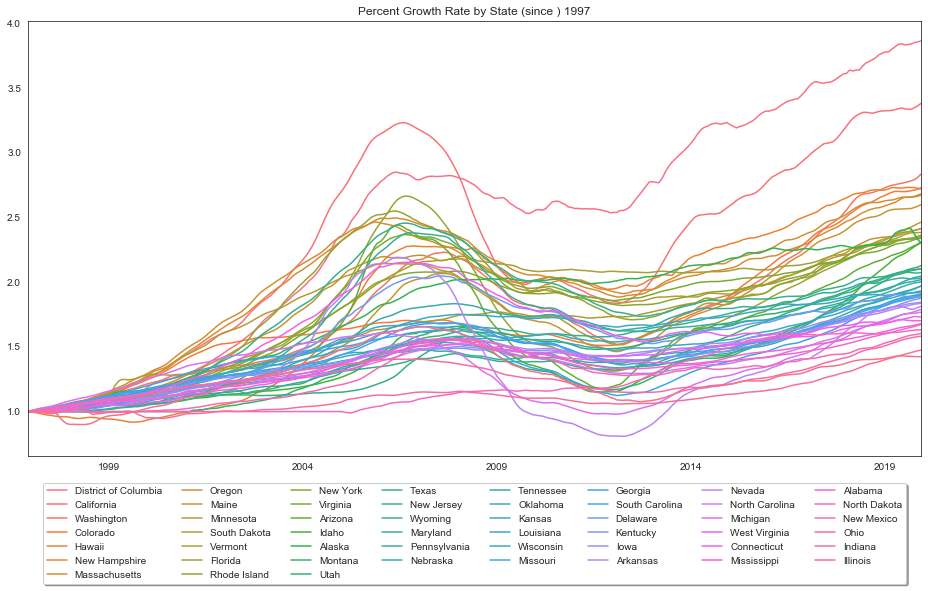

In [18]:
date = '1996-12-01'

df_pct = ((df - df.shift(1))/df)+1
df_pct.loc[date,:] = 1
df_pct = df_pct.loc[date:].fillna(method='ffill').cumprod()
df_pct.sort_values(by=df_pct.index[-1],axis=1,ascending=False).plot(figsize=(16,8))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=8, fancybox=True, shadow=True)
plt.title('Percent Growth Rate by State (since ) ' + str(df_pct.index[1].year))

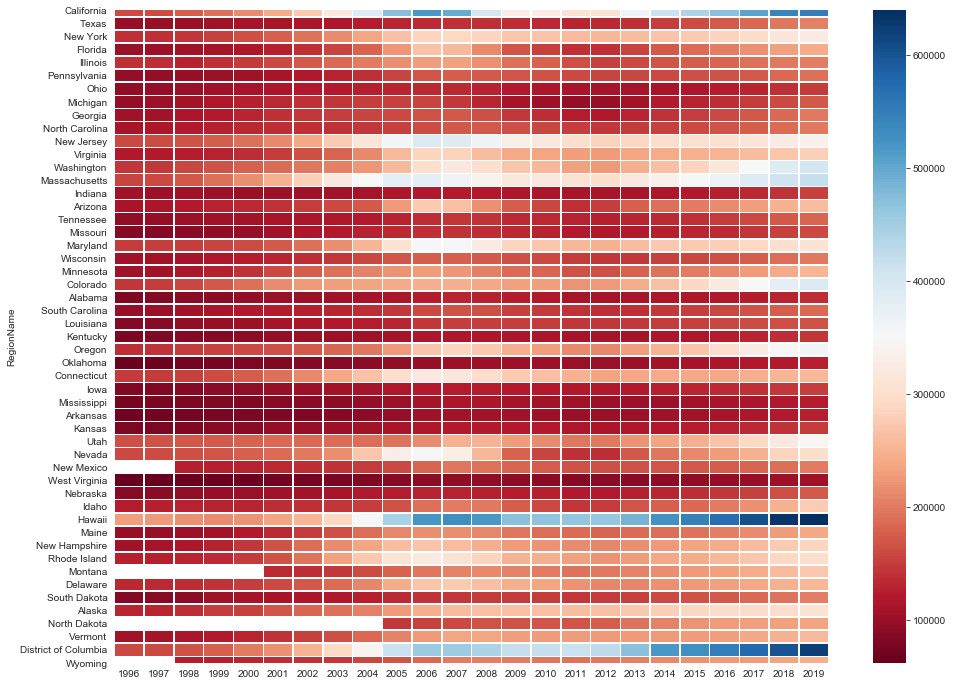

In [19]:
x = df.resample('Y').mean()
x.index = x.index.year
plt.figure(figsize=(16,12))
sns.heatmap(x.T, annot=False,linewidth = 0.5, cmap='RdBu')

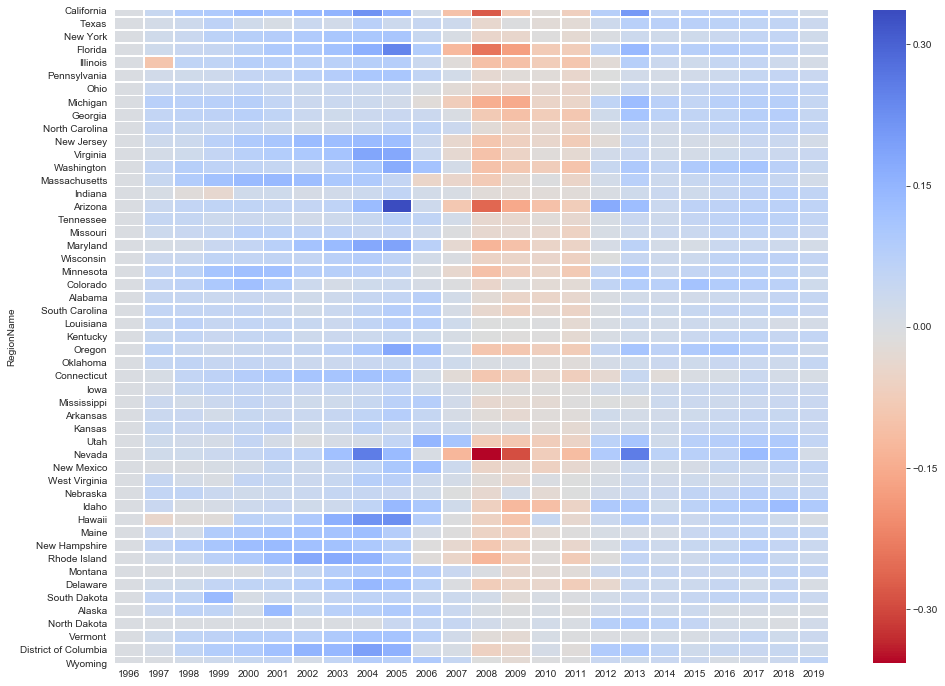

In [20]:
x = ((df - df.shift(1))/df)
x = x.resample('Y').sum()
x.index = x.index.year
plt.figure(figsize=(16,12))
sns.heatmap(x.T, annot=False,linewidth = 0.5, cmap='coolwarm_r')

Text(0.5, 1.0, 'Percent Growth Rate by State (since ) 2001')

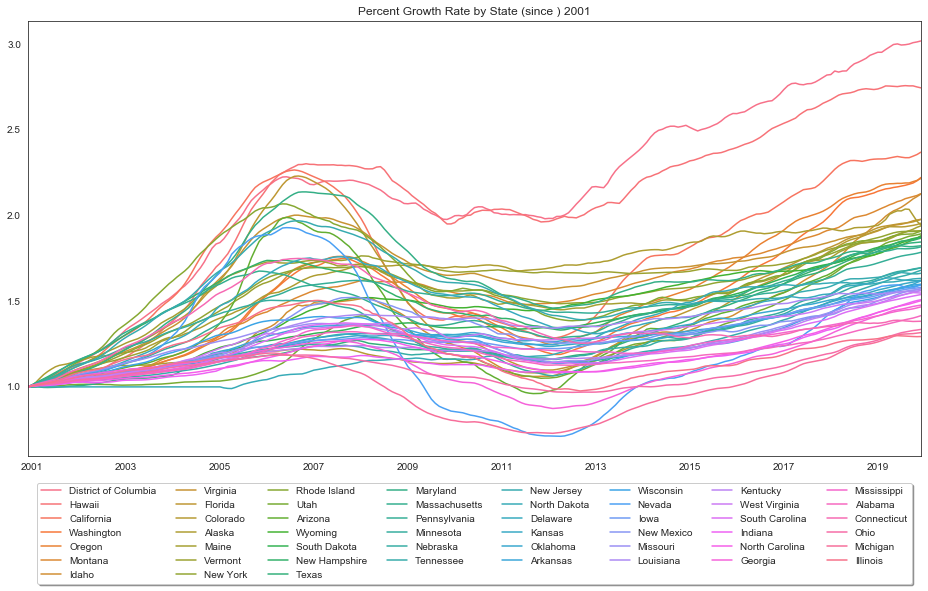

In [7]:
date = '2000-12-01'

df_pct = ((df - df.shift(1))/df)+1
df_pct.loc[date,:] = 1
df_pct = df_pct.loc[date:].fillna(method='ffill')
df_pct.cumprod().sort_values(by=df_pct.index[-1],axis=1,ascending=False).plot(figsize=(16,8))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=8, fancybox=True, shadow=True)
plt.title('Percent Growth Rate by State (since ) ' + str(df_pct.index[1].year))

Text(0.5, 1.0, 'Percent Growth Rate by State (since ) 2009')

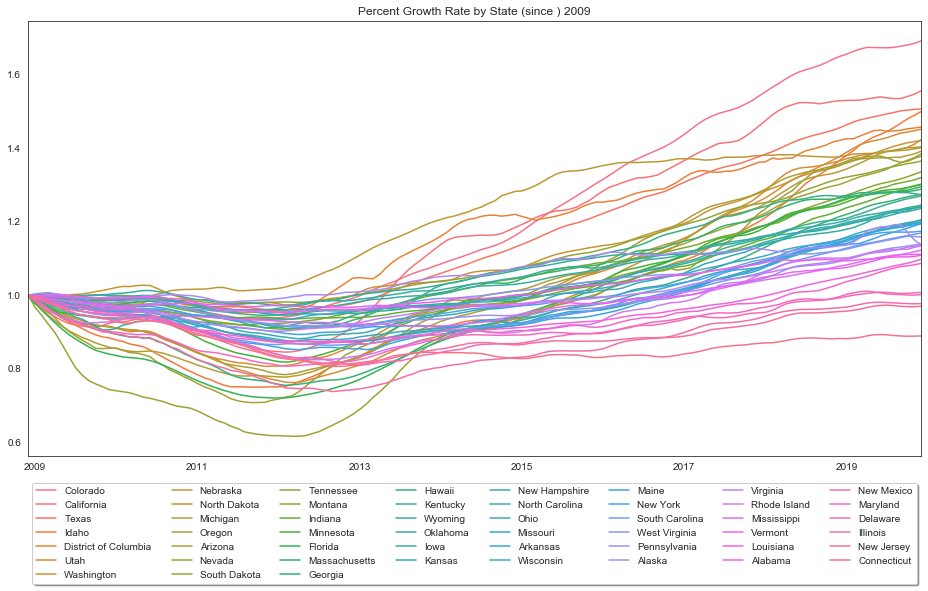

In [8]:
date = '2008-12-01'

df_pct = ((df - df.shift(1))/df)+1
df_pct.loc[date,:] = 1
df_pct = df_pct.loc[date:].fillna(method='ffill')
df_pct.cumprod().sort_values(by=df_pct.index[-1],axis=1,ascending=False).plot(figsize=(16,8))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=8, fancybox=True, shadow=True)
plt.title('Percent Growth Rate by State (since ) ' + str(df_pct.index[1].year))

In [24]:
zip_data.index = zip_data['RegionName']

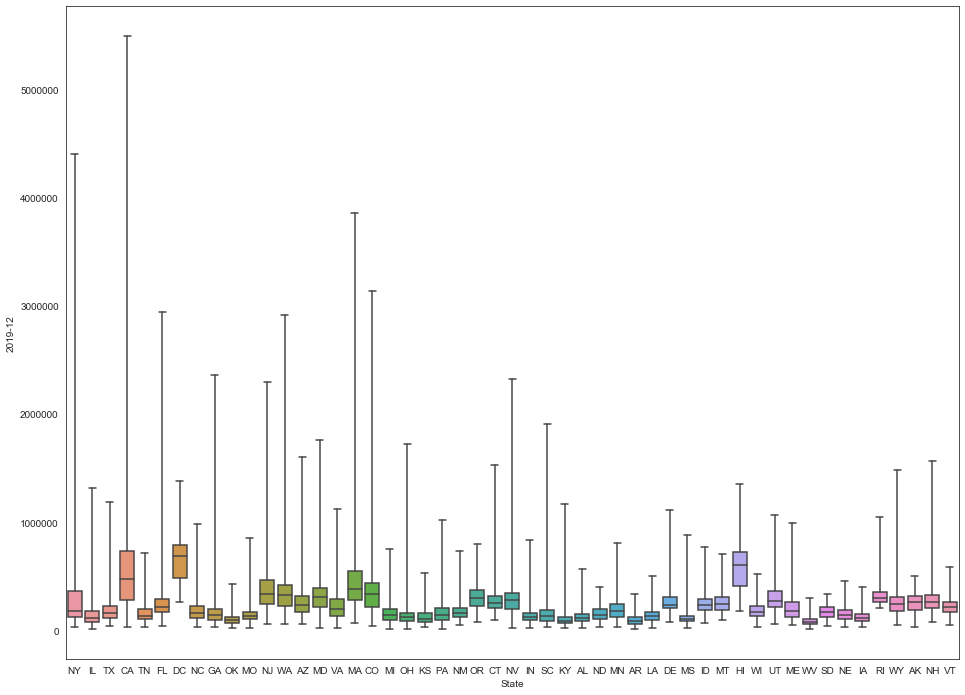

In [10]:
plt.figure(figsize=(16,12))
sns.boxplot(x=zip_data['State'], y=zip_data['2019-12'], data=zip_data,
            whis="range")

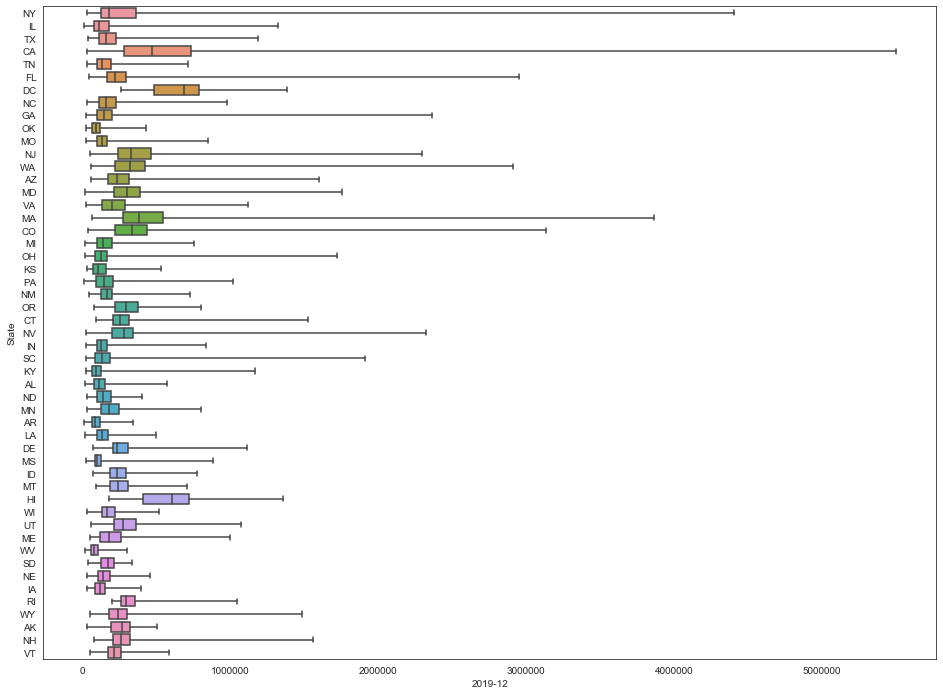

In [21]:

plt.figure(figsize=(16,12))
sns.boxplot(y=zip_data['State'], x=zip_data['2019-12'], data=zip_data,
            whis="range",orient='h')

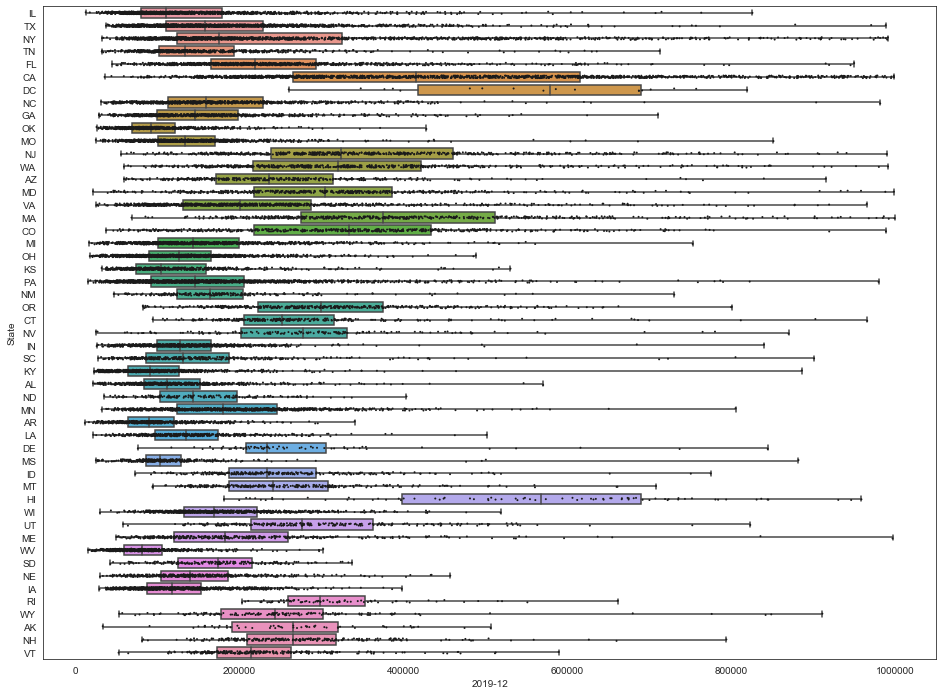

In [22]:
#removing less than 100000
df = zip_data[zip_data['2019-12'] <= 1000000] 
plt.figure(figsize=(16,12))
sns.boxplot(y=df['State'], x=df['2019-12'], data=df,
            whis="range",orient='h')
sns.stripplot(y=df['State'], x=df['2019-12'], data=df,color=".1",size=2)

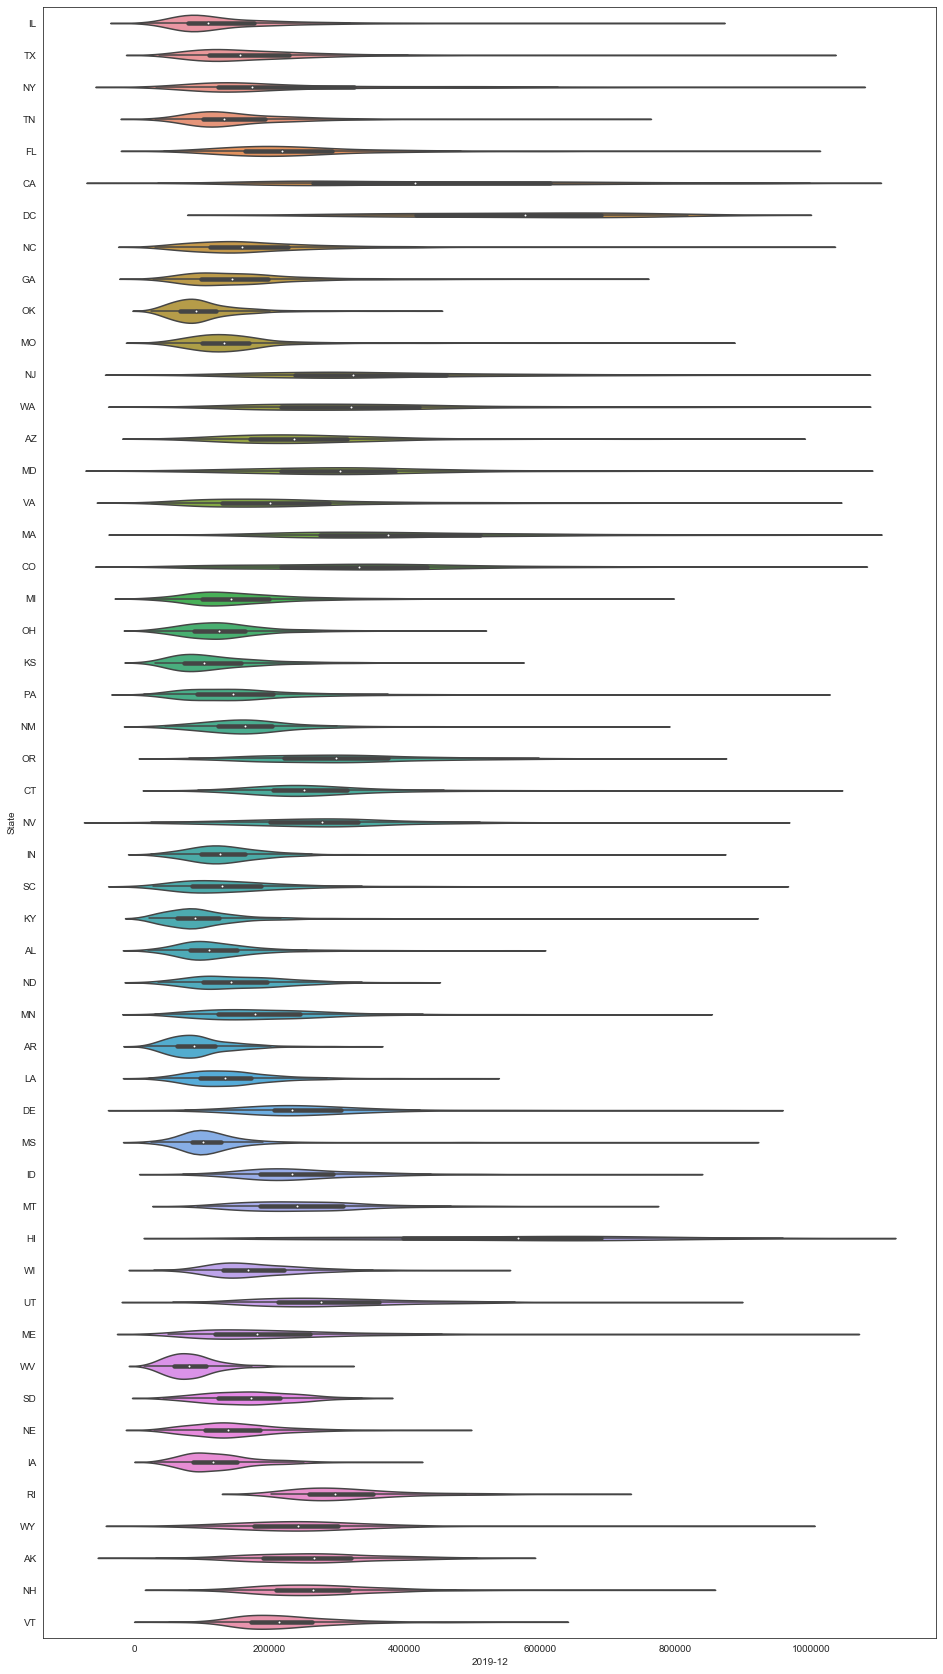

In [23]:
#removing less than 100000
df = zip_data[zip_data['2019-12'] <= 1000000] 
plt.figure(figsize=(16,30))
sns.violinplot(y=df['State'], x=df['2019-12'], data=df,
            whis="range",orient='h')